In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import sys
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import configparser
sys.path.insert(0, 'Utils/')

from AISDataManager import AISDataManager
import SimpleUtils as sU
import Constants as c
import TimeUtils as timeUtils
import datetime

aISDM = AISDataManager()

In [3]:
def convert_to_seconds(timeDel):
    return datetime.timedelta.total_seconds(timeDel)

In [4]:
srcDir = "/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/"
mMSIListFile = srcDir + 'VesselTrajCount.txt'
mMSIList = [line.rstrip('\n') for line in open(mMSIListFile)]

trajSOGMeanList = []
trajSOGMedianList = []
trajSOGStdList = []
trajLenList = []
trajDF = pd.DataFrame(columns=['MMSI' \
                               , 'TRAJ_NUM' \
                               , 'TRAJ_TIME' \
                               , 'SOG_MEAN' \
                               , 'SOG_MEDIAN' \
                               , 'SOG_STD' \
                               , 'TRAJ_MON' \
                               , 'TRAJ_YEAR' \
                               , ])

totalTrajectories = 0
for mMSI in mMSIList[0:]:
    vesselName, numTrajs, _ = mMSI.split("-")
    for traj in range(int(numTrajs)):
        vesselFileName = srcDir + vesselName + '_' + str(traj) + '.csv'
        print(vesselFileName)
        ret, _ = aISDM.load_data_from_csv(vesselFileName) 
        ret = aISDM.formate_time(ret,'DateTime')
        trajInitT = ret['DateTime'][0]
        trajEndT = ret['DateTime'][ret['DateTime'].shape[0]-1]
        
        trajLen = convert_to_seconds(trajEndT - trajInitT)/timeUtils.NUM_SEC_IN_MIN
        
        trajLenList.append(trajLen)
        trajSOGMeanList.append(ret[c.SOG_COL_NAME].mean())
        trajSOGMedianList.append(ret[c.SOG_COL_NAME].median())
        trajSOGStdList.append(ret[c.SOG_COL_NAME].std())
        
        trajDF = trajDF.append({'MMSI':vesselName \
                                ,'TRAJ_NUM':traj \
                                ,'TRAJ_TIME':trajLen \
                                ,'SOG_MEAN':ret[c.SOG_COL_NAME].mean() \
                                ,'SOG_MEDIAN':ret[c.SOG_COL_NAME].median() \
                                ,'SOG_STD':ret[c.SOG_COL_NAME].std() \
                                ,'TRAJ_MON':trajInitT.month \
                                ,'TRAJ_YEAR':trajInitT.year \
                               } \
                                , ignore_index= True)
        
        totalTrajectories = totalTrajectories + 1
        
trajSOGMeanList = np.array(trajSOGMeanList)
trajSOGMedianList = np.array(trajSOGMedianList)
trajSOGStdList = np.array(trajSOGStdList)
trajLenList = np.array(trajLenList)

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356577000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356577000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356577000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356577000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356577000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356577000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356577000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356577000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356577000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356577000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3565

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477271300_31.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477271300_32.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477271300_33.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477271300_34.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477271300_35.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477271300_36.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477271300_37.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477271300_38.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477271300_39.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355481000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356581000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356581000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356581000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356581000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356581000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356581000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356581000_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356581000_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356581000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356581000_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355856000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355856000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355856000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355856000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355856000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355856000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355856000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355856000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355856000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351828000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356347000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356347000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356347000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356347000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356347000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356347000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356347000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356347000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356347000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356347000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_10

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355530000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355530000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355530000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356124000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356124000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356124000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356571000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356571000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356571000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356571000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3565

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356541000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356541000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356541000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351848000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351848000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351848000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351848000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351848000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351848000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351848000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3518

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477276600_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477276600_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477276600_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477276600_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477276600_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477276600_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477276600_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477276600_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352444000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352444000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353295000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353295000_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353295000_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353295000_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353295000_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353295000_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353295000_28.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353295000_29.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353295000_30.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353295000_31.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477300500_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477300500_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477300500_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477300500_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477300500_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477300500_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477300500_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477300500_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353260000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353260000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353788000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353788000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353788000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353788000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353788000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353788000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353788000_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353788000_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353788000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353788000_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352948000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352948000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352948000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352948000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352948000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352948000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352948000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352948000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352948000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352948000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352915000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352915000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352915000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352915000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352879000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352879000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352879000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352879000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352879000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352823000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3528

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356798000_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356798000_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356798000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353212000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352608000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352608000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352608000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353210000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353191000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353162000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353100000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353100000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353100000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353100000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353100000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353093000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353093000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353093000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352713000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352713000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3527

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354886000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354886000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354886000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354886000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354886000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354886000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354886000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354886000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354886000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354886000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_100

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354942000_40.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354942000_41.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354942000_42.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354942000_43.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354942000_44.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354942000_45.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354942000_46.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354942000_47.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354942000_48.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354942000_49.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355286000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355286000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355286000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355286000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355286000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355286000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355286000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355286000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477280800_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477280800_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/4772

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355185000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355185000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354619000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354614000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354614000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354614000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354614000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354614000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354614000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354614000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3546

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354202000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354202000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354202000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354202000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354202000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354202000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354202000_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354202000_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354202000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354202000_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354047000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354047000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354047000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354047000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352196000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352196000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352196000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352196000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352218000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352218000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3522

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352135000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352135000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352135000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352135000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352133000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354248000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354591000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354591000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354591000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354591000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354362000_42.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354362000_43.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354362000_44.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354362000_45.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354362000_46.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354362000_47.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354362000_48.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354362000_49.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354362000_50.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354362000_51.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413173000_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413173000_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413173000_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413173000_28.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413173000_29.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413173000_30.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413173000_31.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413173000_32.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413173000_33.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413173000_34.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372204000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372204000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372204000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372204000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372204000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372204000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372204000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372204000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372204000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372221000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3722

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372134000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372336000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372336000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372341000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372341000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372341000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372341000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372341000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372341000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372341000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3723

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372117000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372117000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372104000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372104000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372104000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372104000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372104000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372104000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372104000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372104000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3721

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367438000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367438000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367438000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367438000_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367438000_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367438000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367438000_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367438000_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367438000_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367438000_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371961000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371961000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371961000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371961000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371961000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371961000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371961000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371961000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371961000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371961000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372038000_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372038000_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372038000_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372038000_28.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372038000_29.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372038000_30.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372038000_31.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372031000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372031000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372031000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_10

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210161000_46.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210161000_47.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210161000_48.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210161000_49.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210161000_50.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210161000_51.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210161000_52.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210161000_53.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210161000_54.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210161000_55.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210280000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367196000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367196000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367196000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367196000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367196000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367196000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367196000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367196000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367196000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3671

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373457000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373457000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373457000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373457000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373457000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373457000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373457000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373457000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373470000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373470000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3734

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372724000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372724000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372724000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372724000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372724000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372724000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372724000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372724000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372724000_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372724000_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372983000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372973000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372973000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372973000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372973000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372973000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372955000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372955000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372955000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372955000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3729

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372827000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372827000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372827000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372827000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372827000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372827000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372827000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372827000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372827000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372827000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370188000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370188000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370188000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370188000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370188000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370188000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370188000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370212000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370212000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370270000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_10

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_35.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_36.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_37.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_38.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_39.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_40.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_41.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_42.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_43.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_44.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370644000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370644000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370644000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370644000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370413000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370413000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370413000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370011000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370011000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370011000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3699

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368305000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368305000_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368305000_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368305000_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368305000_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368305000_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368305000_28.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368305000_29.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368305000_30.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368305000_31.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367578740_49.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367578740_50.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368680000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368680000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368680000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368680000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368680000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368680000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368680000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368680000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/36

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368684000_32.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368684000_33.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368684000_34.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368684000_35.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368684000_36.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368684000_37.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368684000_38.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368684000_39.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368684000_40.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368684000_41.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369326000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369326000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369247000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369247000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369247000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369247000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369247000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369247000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369247000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369247000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/36

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368686000_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368686000_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368686000_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368686000_28.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368686000_29.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368686000_30.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368686000_31.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368686000_32.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368686000_33.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368686000_34.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369296000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369296000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369296000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369296000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369296000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369296000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369296000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369296000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369296000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369296000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371544000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371544000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371544000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371544000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371544000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371544000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371544000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371544000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371544000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371544000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371349000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371349000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371349000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371349000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371349000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371323000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371318000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371318000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371318000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371318000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3713

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370894000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370894000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370894000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370894000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370894000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370894000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370894000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370894000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370894000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370897000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371185000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371185000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371185000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371185000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371185000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371185000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370737000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370737000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370737000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370737000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3707

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477177400_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366758000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366758000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366758000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366758000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366758000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366758000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366758000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366758000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366758000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3667

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477182400_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477182400_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477182400_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477182400_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477182400_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477182400_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477182400_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477182400_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477182400_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477182400_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477192900_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477192900_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477192900_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477192900_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477192900_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477192900_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477192900_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477192900_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477192900_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477192900_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366563000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366563000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366563000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366563000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366563000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366563000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366563000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366563000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366563000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366563000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366791000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366791000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366791000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366791000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366791000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366791000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366791000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366791000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366791000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366791000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477067800_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477067800_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477067800_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477067800_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477067800_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477067800_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477067800_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477067800_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477067800_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477067800_28.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477107200_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477107200_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477107200_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477107200_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477107200_28.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477107200_29.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477107200_30.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477107200_31.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477107200_32.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477107200_33.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366799000_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366799000_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366799000_28.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366799000_29.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366799000_30.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366799000_31.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366799000_32.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366799000_33.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366799000_34.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366799000_35.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477133500_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477133300_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477127900_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477127900_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477127900_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477127900_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477127900_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477127900_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477127900_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477127900_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/4771

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477056400_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477056400_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477056400_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477056400_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477056400_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477056400_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477056400_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477056400_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477056400_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477056400_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357170000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357170000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357170000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357147000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357147000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357147000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357147000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357147000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357147000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357138000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3571

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356909000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356909000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356909000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356909000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356909000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356909000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356909000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356909000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356909000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356904000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3569

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357926000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357926000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357926000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357926000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357926000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357926000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357926000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357926000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357926000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357926000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3579

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357777000_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357777000_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357777000_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357777000_28.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357777000_29.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357770000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357770000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357770000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357770000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357770000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357405000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357405000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357405000_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357405000_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357411000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357411000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357411000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357411000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357412000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357412000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357682000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357682000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357682000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357538000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373759000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477050700_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477050700_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477049800_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477049800_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374809000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3748

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413171000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413171000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413171000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413171000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413171000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413171000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413171000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413171000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413171000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413171000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/4

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416467000_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416467000_28.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416467000_29.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416468000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416468000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416468000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416468000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416468000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416468000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416468000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/4

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416497000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416497000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416497000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416497000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416497000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416497000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416497000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416497000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416497000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416497000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374128000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374128000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374128000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374128000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374128000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374128000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374128000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374128000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374128000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374128000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3741

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431165000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431165000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431165000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431165000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431178000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431178000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431178000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431178000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431178000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431178000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014500_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014500_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014500_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014500_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014500_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014500_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014500_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014500_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014500_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014500_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477048000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477048000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477048000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/441992000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/441992000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/441992000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/441992000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/441992000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/441992000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/441992000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/4419

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431265000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431265000_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431265000_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431265000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431265000_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431265000_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431265000_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431265000_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431265000_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431265000_28.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431332000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431332000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431332000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431332000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431332000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431332000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431332000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431332000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431332000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431332000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432722000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432722000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432722000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432722000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432722000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432722000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432722000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431174000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431174000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432716000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351757000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351757000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351757000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351757000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351757000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351757000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351757000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351757000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351757000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351757000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016648_66.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016648_67.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016648_68.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016648_69.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016648_70.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016648_71.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016648_72.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016648_73.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016648_74.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016648_75.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016647_40.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016647_41.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016647_42.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016647_43.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016647_44.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016647_45.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016647_46.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016647_47.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016647_48.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016647_49.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016646_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016646_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016646_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016646_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016646_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016646_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016646_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016646_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016646_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016646_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/303584000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/303584000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/303584000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/303584000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/303584000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/303584000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/303584000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/303584000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/303584000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/303584000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/30

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308599000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308599000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308599000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308599000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308653000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308653000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308653000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308653000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016434_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016434_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/6360

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308717000_60.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308717000_61.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308717000_62.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308717000_63.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308717000_64.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308717000_65.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308717000_66.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308808000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308808000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016424_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_10

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309046000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309046000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309046000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309046000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309046000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309046000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309046000_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309046000_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309046000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309046000_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308369000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308369000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308369000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308369000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308369000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308287000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/305375000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/305533000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/305730000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/305740000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257448000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257448000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257448000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257457000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257512000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257532000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257532000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257560000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257560000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257560000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/2

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257429000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257842000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257842000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257842000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257842000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257842000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257424000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257424000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257343000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257343000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/2568

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256930000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256930000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256930000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256930000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256930000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256930000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256930000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256930000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256930000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256937000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017730_50.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017730_51.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017730_52.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017730_53.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017592_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017592_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017592_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257310000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257313000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257314000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/259976000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/259976000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/259976000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/259976000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/259976000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/259976000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/259976000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/259976000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/259976000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017153_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_100

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/266339000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017176_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017176_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017176_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017176_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017176_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017176_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017176_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017176_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017176_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/6360

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017807_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016265_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016262_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311259000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311259000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311259000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311288000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311288000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311291000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311291000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3112

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311919000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015496_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015496_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015496_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015496_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015496_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015496_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015496_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015496_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015496_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/6360

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_28.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_29.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_30.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_31.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_32.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_33.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_34.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_35.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015183_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015183_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015183_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015183_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015183_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015183_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015183_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015183_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015183_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015183_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013699_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013699_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013699_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013699_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013699_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013699_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013698_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013698_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013698_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013698_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_100

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013694_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013694_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013694_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013694_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013694_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013693_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013693_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013693_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013693_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013693_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015182_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015182_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015182_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015182_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015182_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015182_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015182_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015182_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015182_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015182_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014996_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014996_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014996_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014996_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014996_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014996_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014996_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014996_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014996_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014996_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/63

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311000104_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311000104_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311000104_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311000104_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311000104_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311000104_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016106_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016096_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016096_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016096_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/6360

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/310768000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/310768000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/310768000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/310768000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/310768000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/310768000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/310768000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/310768000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/310768000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/310768000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016242_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016242_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016242_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016242_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016242_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016242_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016242_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016242_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016242_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016242_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/310765000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/310765000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/310765000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/310765000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/310765000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/310765000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/310765000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/310765000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311000080_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311040700_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015743_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015743_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015743_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015743_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015743_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015743_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015743_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015743_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015743_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015743_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015992_37.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015992_38.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311008700_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311008700_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311008700_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311004900_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311000413_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311000421_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311000421_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311000421_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/31

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311003400_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311003900_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311003900_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311003900_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311003900_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311003900_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311003900_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311003900_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311003900_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311003900_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3110

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235009240_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235009240_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235009240_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235009240_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235009240_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235009240_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235009240_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235009240_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235009240_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235009240_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235010450_28.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235010450_29.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235010450_30.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235010450_31.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235010450_32.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235010450_33.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235010710_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235010710_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235010710_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235010710_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_100

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229726000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229726000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092627_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092627_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092627_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092627_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092627_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092627_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092587_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092587_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/2297

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235081957_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235081957_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235081957_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235081957_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235081957_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235081957_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235081957_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235081957_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235081957_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235081957_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235078078_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235078078_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235078078_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235078078_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235078078_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235078078_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235078078_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235078078_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235078078_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235078078_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235075024_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235075024_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235075024_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235075024_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235075311_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235075311_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235075311_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235075311_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092271_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092271_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/6360

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/219617000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/219882000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/219882000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220061000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220061000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220061000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220061000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220061000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220061000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220061000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/2200

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212347000_35.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212347000_36.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212347000_37.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212347000_38.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212348000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212348000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212348000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212348000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212348000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212348000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212350000_36.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212350000_37.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212350000_38.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212350000_39.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212350000_40.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212350000_41.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212350000_42.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212350000_43.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212350000_44.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212350000_45.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/215381000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/215381000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/215381000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/215381000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/215381000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/215381000_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/215381000_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/215381000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/215381000_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/215381000_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229258000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229258000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229452000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229452000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229452000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229452000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229452000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229452000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229452000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229529000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/2295

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220413000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220413000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220413000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220413000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220413000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220413000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220413000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220413000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220413000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220413000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220594000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220594000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220594000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220594000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220594000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220594000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220594000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220594000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220594000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220594000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/22

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220598000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220598000_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/228313800_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/228313800_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/228313800_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/228313800_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/228339600_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/228339600_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235098885_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235098885_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/23

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249758000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249758000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249758000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249758000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249758000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249758000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/248225000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/248225000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/248225000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/248225000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/2482

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/247012900_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/247012900_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/247012900_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/247012900_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091082_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091082_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091082_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091082_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091082_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091082_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805929_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805929_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805929_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805929_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805929_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805929_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805929_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805929_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805929_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805929_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_10

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249819000_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249819000_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249819000_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249819000_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249819000_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249819000_28.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249819000_29.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249819000_30.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249819000_31.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249819000_32.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805590_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805590_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805590_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805590_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805590_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805590_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805590_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805613_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805625_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805662_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_10

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/239850000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091832_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091811_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091811_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/240048000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091803_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091803_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091803_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091803_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091803_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/6360

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092079_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092079_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092079_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092079_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092079_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092079_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092079_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092079_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092079_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092079_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/63

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235554000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235554000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235554000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235554000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235554000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235554000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235554000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235554000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235554000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235554000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/241459000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/241459000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/241459000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/241459000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091188_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/244778000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/244778000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/244790607_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/244810690_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091088_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091717_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091717_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091717_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091717_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091717_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091717_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/240272000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091708_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091708_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091690_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/6360

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_28.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_29.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_30.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_31.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_32.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_33.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_114.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_115.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_116.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_117.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_118.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_119.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_120.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091403_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091403_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091403_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_62.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_63.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_64.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_65.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_66.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_67.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_68.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_69.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_70.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_71.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004202_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004202_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004202_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004202_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004171_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004171_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004171_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004171_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004171_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004171_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/5380

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005045_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005045_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005045_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005045_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005026_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005026_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005020_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005020_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005018_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005018_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/5380

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538001657_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538001657_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538001657_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538001657_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538001657_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538001657_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538001657_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538001657_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538001657_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538001657_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003742_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005113_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005113_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005113_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005113_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005113_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005113_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005113_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005113_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005113_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/5380

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563001200_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563001200_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563000900_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563000900_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563000800_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563000800_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563000800_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563000800_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563000800_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563000700_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/5630

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538006057_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538006057_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538006034_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538006034_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538006031_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538006031_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538006227_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538006227_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538006227_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538006021_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/5380

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477961600_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477961600_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477961600_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477961600_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477961600_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477961600_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477961600_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477961600_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477961600_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477961600_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477441400_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477441400_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477441400_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477441400_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477441400_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477441400_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477441400_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477441400_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477441400_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477441400_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/4774

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477462400_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477462400_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477462400_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477462400_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477462400_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477390300_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477390300_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477390300_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477390300_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477390300_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477462800_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338832000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338832000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477379000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338860000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351173000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351173000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351173000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351173000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351173000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3511

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351552000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351552000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351552000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351552000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351554000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351554000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351554000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351554000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351554000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351554000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3515

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477351100_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477351100_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477351100_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477351100_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477351100_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477351100_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477351100_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477351100_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477351100_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477351100_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_35.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_36.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_37.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_38.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_39.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_40.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_41.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_42.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_43.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_44.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_131.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_132.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_133.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_134.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_135.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_136.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_137.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_138.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_139.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_140.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_229.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_230.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_231.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_232.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_233.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_234.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_235.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_236.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_237.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_238.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477315000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477315000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477315000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477315000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477315000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477315000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477315000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477315000_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477315000_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477315000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477848700_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477848700_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477848700_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477848700_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477848700_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477848700_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477848700_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477848700_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477848700_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477848700_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477795300_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477795300_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477795300_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477795300_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477795300_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477795300_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477795300_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477795300_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477795300_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477795300_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477947100_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477947100_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477947100_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477947100_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477947100_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477947100_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477947100_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477947100_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477947100_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477947100_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477655900_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477655900_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477655900_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477655800_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477655800_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477655800_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477655800_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477655200_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477655200_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477655200_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/4

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477637600_49.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477637600_50.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477633300_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477633300_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477633300_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477633300_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477633300_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477633300_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477633300_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477617400_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/47

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738600_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738600_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738600_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738600_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738600_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738600_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738600_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738600_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738600_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738600_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738200_29.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477728800_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477728800_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477728800_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477728800_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477728800_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477728800_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477728800_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477728800_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477728800_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566267000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566267000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566267000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566288000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566300000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566300000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566300000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566300000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566300000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566300000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/5663

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566389000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566389000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566389000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566389000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566389000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566389000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566389000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566389000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566389000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566389000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/5663

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566409000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566409000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566409000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566409000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566409000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566485000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566485000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566485000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566485000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566485000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/5664

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565661000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565661000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565661000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565661000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565661000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565661000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565661000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565661000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565661000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565661000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_10

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566060000_62.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566060000_63.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566060000_64.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566060000_65.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566060000_66.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566060000_67.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566060000_68.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566060000_69.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566060000_70.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566060000_71.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338009000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338009000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338009000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338009000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338009000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338009000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338009000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566705000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566705000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566705000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/5

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636009381_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636009381_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636009381_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636009381_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636009381_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636009381_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636009381_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636009381_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636009381_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636009672_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013522_32.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013522_33.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013522_34.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013522_35.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013522_36.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013522_37.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013522_38.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013522_39.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013522_40.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013522_41.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319073100_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319073100_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/576081000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/576081000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/572943210_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319392000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319392000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319392000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319392000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319392000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3193

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319885000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319885000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319885000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319885000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319885000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319740000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319740000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319740000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319740000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319740000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3197

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319904000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319904000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319904000_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319904000_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319904000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319904000_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319904000_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319904000_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319904000_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319904000_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566999000_43.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566999000_44.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566999000_45.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566998000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566998000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566998000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566998000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566951000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566951000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566951000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/5

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566956000_37.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566956000_38.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566956000_39.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566956000_40.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566956000_41.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566956000_42.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566953000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566953000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566974000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566974000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_100

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563876000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563871000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563858000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563858000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563858000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563858000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563858000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563858000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563858000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563858000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/5638

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564442000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564442000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564442000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564442000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564442000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564442000_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564442000_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564442000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564442000_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564442000_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563105000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563105000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563105000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563105000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563105000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563220000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563220000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563220000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563220000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563220000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563584000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563584000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563584000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563584000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563584000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563584000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563584000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563584000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563584000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563579000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/5635

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563313000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563313000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563313000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563313000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563313000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563313000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563262000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563262000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563262000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563262000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/5632

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565043000_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565043000_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565043000_28.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565043000_29.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565043000_30.csv


In [5]:
destFile = "/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/Output/TrackLen_1004.csv"
print(trajDF)
aISDM.save_data_to_csv(trajDF, destFile)

            MMSI TRAJ_NUM    TRAJ_TIME   SOG_MEAN  SOG_MEDIAN   SOG_STD  \
0      356577000        0   554.500000  16.975686       17.00  0.403128   
1      356577000        1   256.166667  11.013122       11.90  2.815244   
2      356577000        2   566.083333  15.106538       15.40  1.699642   
3      356577000        3   289.000000   9.225100        9.60  1.643499   
4      356577000        4   602.983333  10.999042       11.30  1.597581   
5      356577000        5   115.783333  15.809434       16.70  2.706554   
6      356577000        6   320.183333   8.928571        9.30  1.321332   
7      356577000        7   319.666667   9.424014        9.60  0.781276   
8      356577000        8   979.033333   8.874653        9.90  2.464255   
9      356577000        9   285.500000   8.741633        8.60  0.907156   
10     356577000       10  1054.333333  10.682885        9.70  2.935055   
11     356577000       11   275.333333  12.048361       12.70  2.058276   
12     356688000        0

0

In [6]:
print(totalTrajectories)

17502


In [7]:
month1TrajDF = trajDF.loc[trajDF['TRAJ_MON'] == 1]
month2TrajDF = trajDF.loc[trajDF['TRAJ_MON'] == 2]
month3TrajDF = trajDF.loc[trajDF['TRAJ_MON'] == 3]
month4TrajDF = trajDF.loc[trajDF['TRAJ_MON'] == 4]
month5TrajDF = trajDF.loc[trajDF['TRAJ_MON'] == 5]
month6TrajDF = trajDF.loc[trajDF['TRAJ_MON'] == 6]
month7TrajDF = trajDF.loc[trajDF['TRAJ_MON'] == 7]
month8TrajDF = trajDF.loc[trajDF['TRAJ_MON'] == 8]
month9TrajDF = trajDF.loc[trajDF['TRAJ_MON'] == 9]
month10TrajDF = trajDF.loc[trajDF['TRAJ_MON'] == 10]
month11TrajDF = trajDF.loc[trajDF['TRAJ_MON'] == 11]
month12TrajDF = trajDF.loc[trajDF['TRAJ_MON'] == 12]

In [8]:
seasonalSOG = [ \
    month1TrajDF['SOG_MEAN'].mean() \
    , month2TrajDF['SOG_MEAN'].mean() \
    , month3TrajDF['SOG_MEAN'].mean() \
    , month4TrajDF['SOG_MEAN'].mean() \
    , month5TrajDF['SOG_MEAN'].mean() \
    , month6TrajDF['SOG_MEAN'].mean() \
    , month7TrajDF['SOG_MEAN'].mean() \
    , month8TrajDF['SOG_MEAN'].mean() \
    , month9TrajDF['SOG_MEAN'].mean() \
    , month10TrajDF['SOG_MEAN'].mean() \
    , month11TrajDF['SOG_MEAN'].mean() \
    , month12TrajDF['SOG_MEAN'].mean() \
]

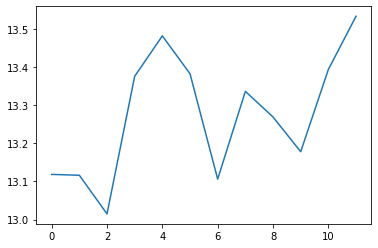

In [9]:
plt.plot(seasonalSOG)

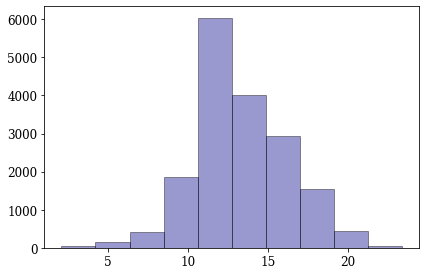

In [10]:
plt.rc('font',family='serif')
plt.tick_params(labelsize=12)
plt.tight_layout()

sns.distplot(trajSOGMeanList \
             , hist=True \
             , kde=False \
             , bins = 10 \
             , color = 'darkblue' \
             , hist_kws = {'edgecolor':'black'} \
             , kde_kws = {'linewidth': 4} \
            )

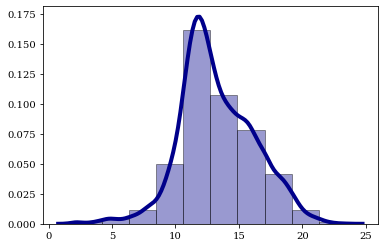

In [11]:
sns.distplot(trajSOGMeanList \
             , hist=True \
             , kde=True \
             , bins = 10 \
             , color = 'darkblue' \
             , hist_kws = {'edgecolor':'black'} \
             , kde_kws = {'linewidth': 4} \
            )

In [12]:
print(trajSOGMeanList.min())
print(trajSOGMeanList.max())
print(trajSOGMeanList.mean())
print(trajSOGMeanList.std())

2.059375
23.438514680483593
13.275093919314171
2.9282714216067918


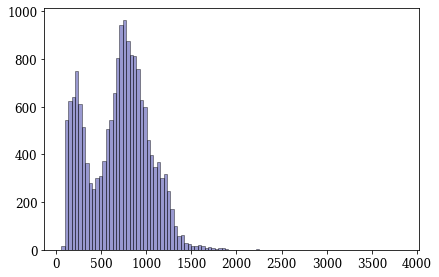

In [13]:
plt.rc('font',family='serif')
plt.tick_params(labelsize=12)
plt.tight_layout()

sns.distplot(trajLenList \
             , hist=True \
             , kde=False \
             , bins = 100 \
             , color = 'darkblue' \
             , hist_kws = {'edgecolor':'black'} \
             , kde_kws = {'linewidth': 4} \
            )

In [14]:
print(trajLenList.min())
print(trajLenList.max())
print(trajLenList.mean())
print(trajLenList.std())

62.68333333333333
3836.383333333333
694.9758665676304
338.17630957160065


In [15]:
trajLenShort = (trajLenList <= 90)
print(np.sum(trajLenShort))

6


In [16]:
trajLenLong = (trajLenList > 2000)
print(np.sum(trajLenLong))

12


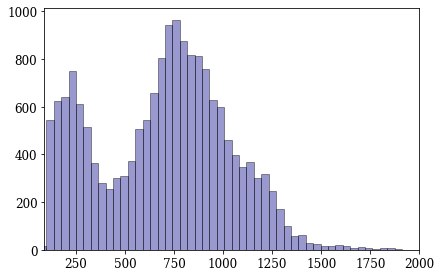

In [17]:
plt.rc('font',family='serif')
plt.tick_params(labelsize=12)
plt.tight_layout()
plt.xlim(90,2000)

sns.distplot(trajLenList \
             , hist=True \
             , kde=False \
             , bins = 100 \
             , color = 'darkblue' \
             , hist_kws = {'edgecolor':'black'} \
             , kde_kws = {'linewidth': 4} \
            )

In [18]:
srcDirTanker = "/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/"
mMSIListFileTanker = srcDirTanker + 'VesselTrajCount.txt'
mMSIListTanker = [line.rstrip('\n') for line in open(mMSIListFileTanker)]

trajSOGMeanTankerList = []
trajSOGMedianTankerList = []
trajSOGStdTankerList = []
trajLenTankerList = []

trajDFTanker = pd.DataFrame(columns=['MMSI' \
                               , 'TRAJ_NUM' \
                               , 'TRAJ_TIME' \
                               , 'SOG_MEAN' \
                               , 'SOG_MEDIAN' \
                               , 'SOG_STD' \
                               , 'TRAJ_MON' \
                               , 'TRAJ_YEAR' \
                               , ])

totalTankerTrajectories = 0
for mMSI in mMSIListTanker[0:]:
    vesselName, numTrajs, _ = mMSI.split("-")
    for traj in range(int(numTrajs)):
        vesselFileName = srcDirTanker + vesselName + '_' + str(traj) + '.csv'
        print(vesselFileName)
        ret, _ = aISDM.load_data_from_csv(vesselFileName) 
        ret = aISDM.formate_time(ret,'DateTime')
        trajInitT = ret['DateTime'][0]
        trajEndT = ret['DateTime'][ret['DateTime'].shape[0]-1]

        trajLen = convert_to_seconds(trajEndT - trajInitT)/timeUtils.NUM_SEC_IN_MIN

        trajLenTankerList.append(trajLen)
        trajSOGMeanTankerList.append(ret[c.SOG_COL_NAME].mean())
        trajSOGMedianTankerList.append(ret[c.SOG_COL_NAME].median())
        trajSOGStdTankerList.append(ret[c.SOG_COL_NAME].std())
        
        trajDFTanker = trajDFTanker.append({'MMSI':vesselName \
                                ,'TRAJ_NUM':traj \
                                ,'TRAJ_TIME':trajLen \
                                ,'SOG_MEAN':ret[c.SOG_COL_NAME].mean() \
                                ,'SOG_MEDIAN':ret[c.SOG_COL_NAME].median() \
                                ,'SOG_STD':ret[c.SOG_COL_NAME].std() \
                                ,'TRAJ_MON':trajInitT.month \
                                ,'TRAJ_YEAR':trajInitT.year \
                               } \
                                , ignore_index= True)
        
        totalTankerTrajectories = totalTankerTrajectories + 1
        
trajSOGMeanTankerList = np.array(trajSOGMeanTankerList)
trajSOGMedianTankerList = np.array(trajSOGMedianTankerList)
trajSOGStdTankerList = np.array(trajSOGStdTankerList)
trajLenTankerList = np.array(trajLenTankerList)

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636092413_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636092413_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636092413_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636092413_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636092413_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636092413_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636092413_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636092413_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636092413_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/235009420_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/2350

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/235076283_57.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/235076283_58.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/235076283_59.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/235076283_60.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/235076283_61.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/235076283_62.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/235076283_63.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/235076283_64.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/235076283_65.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/235076283_66.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636014804_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636014804_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636014804_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636014804_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636014804_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636014804_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636014804_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636014804_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636014804_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636014804_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367688000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367688000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367688000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367688000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367688000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367688000_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367688000_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367688000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367688000_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367688000_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/229079000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/229079000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/229079000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/229079000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/735057548_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/566479000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/229208000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/229317000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/229317000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/229317000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/2109

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367353080_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367353080_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367353080_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367353080_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367353080_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367353080_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367353080_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367353080_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367353080_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367353080_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_10

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/219289000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/219289000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/219289000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/219289000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/219290000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/219290000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/219290000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/219290000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/219398000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/219398000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/2196

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636012801_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636012801_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636012801_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636012801_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636012801_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636012884_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636012884_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636012884_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636012884_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636012884_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/6360

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366948190_42.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366948190_43.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366948190_44.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366948190_45.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366948190_46.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366948190_47.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366948190_48.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366948190_49.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366948190_50.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366948190_51.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_56.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_57.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_58.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_59.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_60.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_61.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_62.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_63.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_64.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_65.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_148.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_149.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_150.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_151.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_152.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_153.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_154.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_155.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_156.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_157.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/247230300_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636016693_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636016693_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636016693_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636016695_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636016695_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636016695_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636016696_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636016696_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/303294000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/3032

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/303031000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/303031000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/303031000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/303031000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/303031000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/303031000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/303031000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/303031000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/303031000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/273349660_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/273

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/309038000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/309038000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/309038000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/309038000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/244841000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/244841000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/308893000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/308893000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/308893000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/308371000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/3083

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/256799000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636017856_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636017857_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636017857_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636017857_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636017858_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636017858_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636017858_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636017858_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636017858_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/6360

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/259706000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/259706000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/259706000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/259706000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636090950_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636090950_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636090950_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636090950_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/259266000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/259266000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/2473

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636015178_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636015178_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636015178_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636015178_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636015178_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636015178_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636015178_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636015178_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636015178_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/240678000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311707000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311499000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311499000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311499000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311499000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311499000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636015175_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636015175_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636015175_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636015175_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/6360

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/240657000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/240657000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/240657000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/240657000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/240657000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/240657000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/240657000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/240657000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/413013000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/413013000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/41

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_28.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_29.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_30.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_31.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_32.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_33.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_34.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_35.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_36.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_128.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_129.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_130.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_131.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_132.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_133.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_134.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_135.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_136.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_137.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_226.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_227.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_228.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_229.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_230.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_231.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_232.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_233.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_234.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_235.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_326.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_327.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_328.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_329.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_330.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_331.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_332.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_333.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_334.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_335.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_46.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_47.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_48.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_49.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_50.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_51.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_52.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_53.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_54.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_55.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_145.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_146.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_147.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_148.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_149.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_150.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_151.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_152.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_153.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_154.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_246.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_247.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_248.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_249.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_250.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_251.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_252.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_253.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_254.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_255.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/310620000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/310620000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/310620000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/372635000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/241080000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/241080000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/241080000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/241080000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/241080000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/241132000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/2411

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000467_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000467_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000467_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000467_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000467_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000467_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000467_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000467_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000467_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000467_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/3110

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_28.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_29.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_30.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_31.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_32.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_120.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_121.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_122.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_123.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_124.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_125.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_126.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_127.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_128.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_129.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006070_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004480_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004480_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004480_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004480_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004480_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004480_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004480_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/212032000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/371361000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/3713

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/477593900_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538007511_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538007511_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538007511_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538007511_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538007512_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538007512_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538007512_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538007512_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/477593700_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/5380

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/338221000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/338221000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/338221000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/338221000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/338221000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/338221000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/338221000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/338221000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/338221000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/338221000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/3

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/370854000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005244_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005245_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005249_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005249_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005249_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005249_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/368445000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/368445000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/368445000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/3684

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005319_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005319_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005319_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005319_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005319_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005319_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005319_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005320_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005320_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005320_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/5380

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/368127000_56.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/368127000_57.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/368127000_58.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/368127000_59.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/368127000_60.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/368127000_61.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/368127000_62.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/368127000_63.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/368127000_64.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/368127000_65.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005145_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005163_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005088_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538090209_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538090209_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005404_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005404_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005416_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005788_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004539_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/5380

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005417_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005417_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005417_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005417_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005418_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005418_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005419_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005419_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005419_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538005419_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/5380

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/564693000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538003422_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538003422_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538003422_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538003422_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538003422_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538003526_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538003526_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538003526_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538003526_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/5380

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/370084000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/477213500_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/477211400_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/477211400_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/477211400_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/477211400_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/477211400_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366508000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366508000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366508000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/3665

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/477173600_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/477173600_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/477173600_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/477173600_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/477173600_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/477173600_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/477173600_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/477173600_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/477173600_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/477173600_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/4771

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/477170700_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/477170700_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/564966000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/477163800_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/477163800_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/477163800_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/477163800_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/477163800_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/565018000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/565018000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/5380

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002089_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002089_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002089_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002089_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002089_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002089_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002089_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002089_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002089_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/477171000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/4771

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/351456000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/352814000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/352814000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/352814000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/352814000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/353108000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/353108000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/353265000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/353265000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/353265000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/3532

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/338371000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004167_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004167_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004167_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004167_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004159_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004159_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004159_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004159_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004150_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/4774

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004002_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004002_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004002_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004002_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004002_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004002_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004002_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004002_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004002_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004002_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/5

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/356251000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/356586000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/356586000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/563868000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/356768000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/356768000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/356768000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/356768000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/356768000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/356768000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/3560

In [19]:
destFileTanker = "/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/Output/TrackLen_1024.csv"
print(trajDFTanker)
aISDM.save_data_to_csv(trajDFTanker, destFileTanker)

           MMSI TRAJ_NUM    TRAJ_TIME   SOG_MEAN  SOG_MEDIAN   SOG_STD  \
0     636092413        0  1152.816667  11.628955       11.80  1.305157   
1     636092413        1   480.183333  12.454067       12.50  0.255388   
2     636092413        2   174.833333  10.142763       10.20  0.310863   
3     636092413        3   281.650000  10.242387       10.20  0.316446   
4     636092413        4   961.983333  11.513462       11.40  0.425636   
5     636092413        5   506.500000  10.307432       10.30  0.492622   
6     636092413        6   456.650000  11.429723       11.30  0.444578   
7     636092413        7   709.333333   8.343891        8.40  0.313753   
8     636092413        8   463.483333  11.685519       11.70  0.421521   
9     235009420        0   381.666667  10.812651       11.90  2.273522   
10    235009420        1   311.883333  10.607895       12.30  3.558521   
11    235009420        2  1098.616667  11.336199       11.50  1.605181   
12    235009420        3  1200.633333 

0

In [20]:
print(totalTankerTrajectories)

4608


In [21]:
month1TrajTankerDF = trajDFTanker.loc[trajDFTanker['TRAJ_MON'] == 1]
month2TrajTankerDF = trajDFTanker.loc[trajDFTanker['TRAJ_MON'] == 2]
month3TrajTankerDF = trajDFTanker.loc[trajDFTanker['TRAJ_MON'] == 3]
month4TrajTankerDF = trajDFTanker.loc[trajDFTanker['TRAJ_MON'] == 4]
month5TrajTankerDF = trajDFTanker.loc[trajDFTanker['TRAJ_MON'] == 5]
month6TrajTankerDF = trajDFTanker.loc[trajDFTanker['TRAJ_MON'] == 6]
month7TrajTankerDF = trajDFTanker.loc[trajDFTanker['TRAJ_MON'] == 7]
month8TrajTankerDF = trajDFTanker.loc[trajDFTanker['TRAJ_MON'] == 8]
month9TrajTankerDF = trajDFTanker.loc[trajDFTanker['TRAJ_MON'] == 9]
month10TrajTankerDF = trajDFTanker.loc[trajDFTanker['TRAJ_MON'] == 10]
month11TrajTankerDF = trajDFTanker.loc[trajDFTanker['TRAJ_MON'] == 11]
month12TrajTankerDF = trajDFTanker.loc[trajDFTanker['TRAJ_MON'] == 12]

In [22]:
seasonalTankerSOG = [ \
    month1TrajTankerDF['SOG_MEAN'].mean() \
    , month2TrajTankerDF['SOG_MEAN'].mean() \
    , month3TrajTankerDF['SOG_MEAN'].mean() \
    , month4TrajTankerDF['SOG_MEAN'].mean() \
    , month5TrajTankerDF['SOG_MEAN'].mean() \
    , month6TrajTankerDF['SOG_MEAN'].mean() \
    , month7TrajTankerDF['SOG_MEAN'].mean() \
    , month8TrajTankerDF['SOG_MEAN'].mean() \
    , month9TrajTankerDF['SOG_MEAN'].mean() \
    , month10TrajTankerDF['SOG_MEAN'].mean() \
    , month11TrajTankerDF['SOG_MEAN'].mean() \
    , month12TrajTankerDF['SOG_MEAN'].mean() \
]

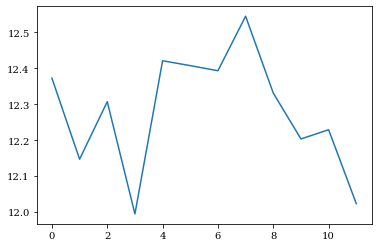

In [23]:
plt.plot(seasonalTankerSOG)

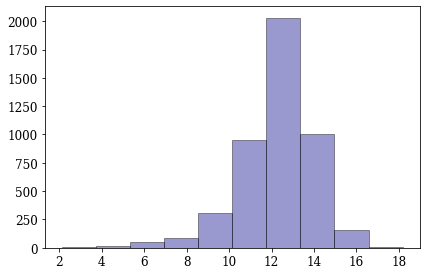

In [24]:
plt.rc('font',family='serif')
plt.tick_params(labelsize=12)
plt.tight_layout()

sns.distplot(trajSOGMeanTankerList \
             , hist=True \
             , kde=False \
             , bins = 10 \
             , color = 'darkblue' \
             , hist_kws = {'edgecolor':'black'} \
             , kde_kws = {'linewidth': 4} \
            )

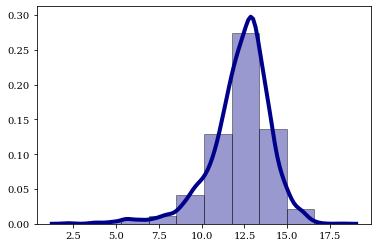

In [25]:
sns.distplot(trajSOGMeanTankerList \
             , hist=True \
             , kde=True \
             , bins = 10 \
             , color = 'darkblue' \
             , hist_kws = {'edgecolor':'black'} \
             , kde_kws = {'linewidth': 4} \
            )

In [26]:
print(trajSOGMeanTankerList.min())
print(trajSOGMeanTankerList.max())
print(trajSOGMeanTankerList.mean())
print(trajSOGMeanTankerList.std())

2.108064516129032
18.177474402730375
12.287109031052303
1.7549180585434476


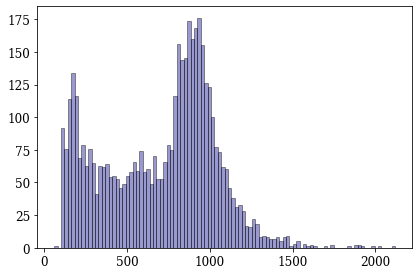

In [27]:
plt.rc('font',family='serif')
plt.tick_params(labelsize=12)
plt.tight_layout()

sns.distplot(trajLenTankerList \
             , hist=True \
             , kde=False \
             , bins = 100 \
             , color = 'darkblue' \
             , hist_kws = {'edgecolor':'black'} \
             , kde_kws = {'linewidth': 4} \
            )

In [28]:
print(trajLenTankerList.min())
print(trajLenTankerList.max())
print(trajLenTankerList.mean())
print(trajLenTankerList.std())

59.18333333333333
2118.65
699.6519603587963
335.55668207655674


In [29]:
trajLenShortTanker = (trajLenTankerList <= 90)
print(np.sum(trajLenShortTanker))

1
